# Imports


In [42]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.4.1


In [43]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
def pprint_numpy_matrix(mat, fmt="g"):
    """Pretty print a numpy matrix"""

    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]

    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# Data Analysis

In [45]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
y_train.shape

(60000,)

In [48]:
y_train[0]

5

In [49]:
pprint_numpy_matrix(X_train[0])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


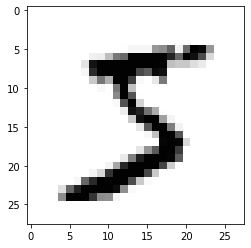

Cette image représente le chiffre 5


In [50]:
# index can goes from 0 to 59 999
index = 0

# plot the image
plt.imshow(X_train[index], cmap='Greys', interpolation='nearest')
plt.show()

print('Cette image représente le chiffre', y_train[index])

# Cleaning

In [51]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [52]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [53]:
# Reshape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [54]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [55]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
print("min", X_train[0].min())
print("max", X_train[0].max())

min 0.0
max 1.0


In [57]:
print("max", X_train[0].max())

max 1.0


# Model creation

In [58]:
def create_model():

  # Init a sequential model
  model = keras.Sequential([


    # Part 1: Feature detector
    # --------------------------------------------------------------------------

    # First VGG block
    # Hidden layer 1: 32 filters, 3x3 kernel, relu activation function
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),

    # Hidden layer 2: 32 filters, 3x3 kernel, relu activation function
    layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),


    # Second VGG block
    # Hidden layer 3: 64 filters, 3x3 kernel, relu activation function
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),

    # Hidden layer 4: 64 filters, 3x3 kernel, relu activation function
    layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),


    # Third VGG block
    # Hidden layer 5: 128 filters, 3x3 kernel, relu activation function
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),

    # Hidden layer 6: 128 filters, 3x3 kernel, relu activation function
    layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),


    # Part 2: classifier
    # --------------------------------------------------------------------------

    # Simple ANN
    layers.Dense(128, kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),


    # Output layer
    layers.Dense(10, activation='softmax')

  ])

  # Compile model 
  model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer="adam",
            metrics=['accuracy'])

  return model

In [59]:
with tf.device('/device:GPU:0'):
  model = create_model()

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)       

In [61]:
epochs = 20

In [62]:
cnn = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test,y_test), shuffle=True)

Epoch 1/20
938/938 [==============================] - 8s 8ms/step - loss: 0.6956 - accuracy: 0.7933 - val_loss: 0.0392 - val_accuracy: 0.9860
Epoch 2/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0273 - val_accuracy: 0.9908
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 4/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0256 - val_accuracy: 0.9914
Epoch 5/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0236 - val_accuracy: 0.9922
Epoch 6/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0205 - val_accuracy: 0.9929
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0214 - val_accuracy: 0.9925
Epoch 

In [63]:
scores = model.evaluate(X_test, y_test)
print('Accuracy : %.2f%%' % (scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9948
Accuracy : 99.48%


# Model evaluation

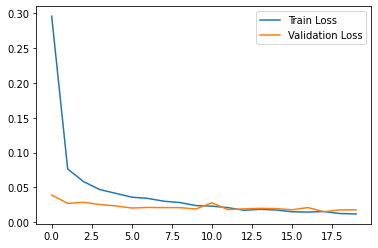

In [64]:
plt.plot(cnn.history['loss'], label='Train Loss')
plt.plot(cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

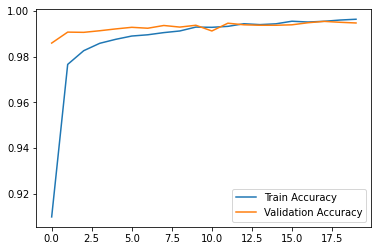

In [65]:
plt.plot(cnn.history['accuracy'], label='Train Accuracy')
plt.plot(cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Prediction

In [66]:
width, height, *_ = X_train[0].shape

prob = model.predict(X_test[11].reshape(1, width, height, 1))
predicted_class = np.argmax(prob, axis=-1)[0]

In [67]:
predicted_class

6

In [68]:
np.argmax(y_test[11])

6

# Saving model

In [69]:
model.save('mnist_cnn_model.h5')